In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import ReadVitalData
import ReadDrugsData

In [2]:
vital = ReadVitalData.vital
mydi = ReadDrugsData.di
klients = ReadVitalData.klients

In [121]:
#mydi.columns
#mydi[mydi.inhaltsstoff == "Insulin lispro-Isophan"]
klients.index(2186303)

97

In [5]:
myklient = klients[120]

,id,klientid,datum,zeitpunkt,medikamentbezeichnung,pzn,anzahl_eingenommen,einheit_eingenommen,atccode,klientid2,inhaltsstoff,menge_pro_medikament,einheit,eingenommene_menge,verwendung
1069604,21085924,5776,2020-08-04,2020-08-04 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069605,21085924,5776,2020-08-04,2020-08-04 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069606,21085924,5776,2020-08-04,2020-08-04 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069607,21085925,5776,2020-08-11,2020-08-11 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069608,21085925,5776,2020-08-11,2020-08-11 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069609,21085925,5776,2020-08-11,2020-08-11 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069610,21085926,5776,2020-08-08,2020-08-08 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069611,21085926,5776,2020-08-08,2020-08-08 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069612,21085926,5776,2020-08-08,2020-08-08 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser
1069613,21085927,5776,2020-08-05,2020-08-05 06:30:00,ACC akut 600mg Hustenlöser BTA,00010808,1,Stck,R05CB01,577602,Acetylcystein,600.0,mg,600.0,Hustenlöser


In [ ]:
mydi_klient = mydi[mydi.klientid2 == myklient]
medikamente = list(mydi_klient.inhaltsstoff.unique())
m = medikamente[1]
df_temp = mydi_klient[mydi_klient.inhaltsstoff == m]
df_temp

In [3]:
def plot_time_data(klient):
    myklient = klients[klient]

    mydi_klient = mydi[mydi.klientid2 == myklient]
    medikamente = list(mydi_klient.inhaltsstoff.unique())
    medikamente = [m for m in medikamente if mydi_klient[mydi_klient.inhaltsstoff == m].verwendung.iloc[0] == 'Diabetes']

    my = vital[vital.klientid2 == myklient]

    my_bz = my[my.bezeichnung.isin(["Blutzucker", "Blutzucker mmol/l"])]
    num = pd.to_numeric(my_bz.wert,errors='coerce')
    my_bz["wert"] = num
    my_bz.sort_values(by='datum',inplace=True)
    my_bz_time = my_bz[["datum","wert"]]
    df_time = my_bz_time.set_index("datum")
    df_time_d = df_time.resample('1w').mean()



    my_bd = my[my.bezeichnung.isin(["Blutdruck"])]
    werte = list(my_bd.wert.apply(str))
    try:
        sys = [float(x.split("/")[0]) if len(x)>1 else np.NaN for x in werte]
    except:
        sys = [float(x.split("/")[0].replace(',', '')) if len(x)>1 else np.NaN for x in werte]
    dia = [float(x.split("/")[1]) if len(x)>1 else np.NaN for x in werte]

    my_bd["sys"] = sys
    my_bd["dia"] = dia
    my_bd.sort_values(by='datum',inplace=True)
    my_bd.sys.describe()
    my_bd_time = my_bd[["datum","sys", "dia"]]
    df_time2 = my_bd_time.set_index("datum")
    df_time2_d = df_time2.resample('1w').mean()


    my_bmi = my[my.bezeichnung == "BMI"]
    werte = list(my_bmi.wert.apply(str))
    num = [float(x.replace(',','.')) for x in werte ]
    my_bmi["wert"] = num
    my_bmi_time = my_bmi[["datum","wert"]]
    df_time3 = my_bmi_time.set_index("datum")
    df_time3_d = df_time3.resample('1w').mean()

    sys = df_time2_d.sys.interpolate(method = 'linear')
    dia = df_time2_d.dia.interpolate(method = 'linear')
    bz = df_time_d.wert.interpolate(method = 'linear')
    bmi = df_time3_d.wert.interpolate(method = 'linear')

    start_date = max(df_time_d.index.min(), df_time2_d.index.min())
    #end_date = start_date + timedelta(days=150)
    end_date = min(df_time_d.index.max(), df_time2_d.index.max())
    #start_date = df_time_d.index.min()
    #end_date = df_time_d.index.max()
    shift = timedelta(days=0)


    fig,axes=plt.subplots(len(medikamente)+2,1,figsize=(15,15),sharex=True)
    for i,m in enumerate(medikamente):
        df_temp = mydi_klient[mydi_klient.inhaltsstoff == m]
        df_temp = df_temp[["datum","eingenommene_menge"]]
        df_temp.sort_values(by='datum',inplace=True)
        df_temp.set_index("datum", inplace=True)
        df = df_temp.resample('1d').sum()
        df = df.resample('1w').mean()
        axes[i].plot(df.eingenommene_menge[start_date+shift:end_date+shift],
                     label=m,color='darkgreen', zorder=2)
        axes[i].set_ylabel(r'$mg$', fontsize=12)
        axes[i].legend(fontsize=12,loc='lower left')
        axes[i].set_ylim([0,None])
        for z in ["right","top","left"]:
            axes[i].spines[z].set_visible(False)

        vals = axes[i].get_yticks()
        for tick in vals:
            axes[i].axhline(y=tick, linestyle='dashed', alpha=0.9, color='#eeeeee', zorder=1)

    axes[len(medikamente)].plot(bmi[start_date+shift:end_date+shift],label='BMI',color='darkgreen')
    vals = axes[len(medikamente)].get_yticks()
    for tick in vals:
        axes[len(medikamente)].axhline(y=tick, linestyle='dashed', alpha=0.9, color='#eeeeee', zorder=1)
    axes[len(medikamente)].legend(fontsize=12,loc='lower left')
    axes[len(medikamente)].set_ylabel(r'$kg/m^2$', fontsize=12)
    for z in ["right","top","left"]:
            axes[len(medikamente)].spines[z].set_visible(False)

    axes[len(medikamente)+1].plot(bz[start_date+shift:end_date+shift],label="Blutzucker",color='darkgreen')
    vals = axes[len(medikamente)+1].get_yticks()
    for tick in vals:
        axes[len(medikamente)+1].axhline(y=tick, linestyle='dashed', alpha=0.9, color='#eeeeee', zorder=1)
    axes[len(medikamente)+1].legend(fontsize=12,loc='lower left')
    axes[len(medikamente)+1].set_ylabel(r'$mg/dl$', fontsize=12)
    for z in ["right","top","left"]:
            axes[len(medikamente)+1].spines[z].set_visible(False)

    #axes[len(medikamente)].plot(sys[start_date+shift:end_date+shift],label="Blutdruck sys")
    #axes[len(medikamente)].plot(dia[start_date+shift:end_date+shift],label="Blutdruck dia")


    fig.suptitle("Patient "+str(myklient), fontsize=16)
    fig.tight_layout()

    #fig.savefig("time_data_per_patient.pdf")
    plt.show()

<ipython-input-3-1910d3afedee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_bz["wert"] = num
<ipython-input-3-1910d3afedee>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_bz.sort_values(by='datum',inplace=True)
<ipython-input-3-1910d3afedee>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_bd["sys"] = sys


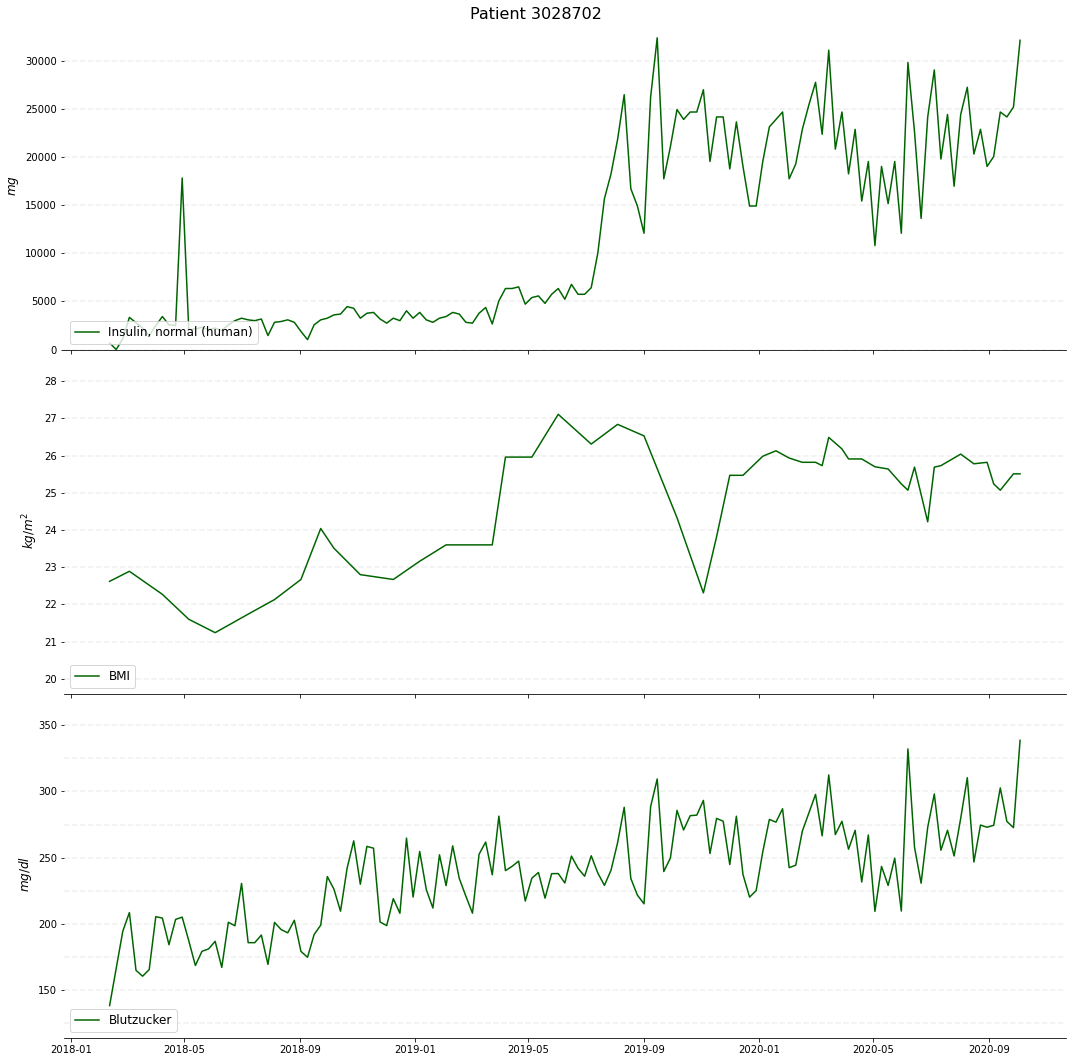

In [8]:
plot_time_data(154)



In [22]:
my_bmi = my[my.bezeichnung == 'BMI']
pd.to_numeric(my_bmi.wert,errors='coerce')

528958   NaN
529257   NaN
534664   NaN
536286   NaN
536994   NaN
541248   NaN
568122   NaN
568368   NaN
570554   NaN
573886   NaN
575361   NaN
575824   NaN
577337   NaN
577696   NaN
578428   NaN
578478   NaN
579783   NaN
581584   NaN
582816   NaN
582969   NaN
584522   NaN
585358   NaN
Name: wert, dtype: float64

In [29]:
mydi_klient[mydi_klient.inhaltsstoff.isin(medikamente)].medikamentbezeichnung.unique()

array(['NovoRapid FlexPen 100 Einheiten/ml 3ml ILO',
       'Lantus 100 Einheiten/ml SoloStar 3ml ILO',
       'Actrapid FlexPen 100 I.E./ml Fertigpen ILO',
       'Actraphane 30/70 FlexPen 100 I.E./ml ISU',
       'Metformin Atid 500mg FTA', 'Metformin-axcount 500mg FTA'],
      dtype=object)

In [30]:
mydi_klient[mydi_klient.inhaltsstoff.isin(medikamente)].inhaltsstoff.unique()

array(['Insulin aspart', 'Insulin glargin', 'Insulin, normal (human)',
       'Insulin-Isophan (human)', 'Metformin hydrochlorid'], dtype=object)

In [8]:
'Torasemid',
 'Metamizol natrium-1-Wasser',
 'Ramipril',
 'Acetylsalicylsäure',
 'Metformin hydrochlorid',
 'Pantoprazol natrium-1,5-Wasser'

"""
Input: Medikamentengaben, BMI, Blutzucker/-druck aus Vergangenheit (absolute Werte
        oder Trend)
Output: Trend / absoluter Wert von Blutzucker/-druck in Zukunft

"""


IndentationError: unexpected indent (<ipython-input-8-b6727da8ca16>, line 2)